In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import os
import warnings
import csv
import re

pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)
pd.set_option("display.float_format", "{:.2f}".format)

In [8]:
os.listdir('../../data')

['data-2019-01-20-proleague-qual.csv',
 'requirements.txt',
 'data-2019-07-21-proleague-finals.csv',
 'data-2019-05-05-london.csv',
 'data-2018-01-14-neworleans.csv',
 'cwl_2018_2019_hp.csv',
 'data-2019-08-18-champs.csv',
 'data-2018-04-08-proleague1.csv',
 'data-2019-06-16-anaheim.csv',
 'data-2017-12-10-dallas.csv',
 'data-2018-04-01-birmingham.csv',
 'README.md',
 'data-2018-04-19-relegation.csv',
 'structured',
 'data-2018-08-19-champs.csv',
 'cwl_2018_2019_snd.csv',
 'data-2018-04-22-seattle.csv',
 'data-2018-07-29-proleague2.csv',
 'data-2018-03-11-atlanta.csv',
 'data-2017-08-13-champs.csv',
 'data-2018-06-17-anaheim.csv',
 'data-2019-03-17-fortworth.csv',
 'data-2019-07-05-proleague.csv']

In [9]:
cwl_2018_2019_snd = pd.read_csv('../../data/cwl_2018_2019_snd.csv')
cwl_2018_2019_hp = pd.read_csv('../../data/cwl_2018_2019_hp.csv')

/var/folders/zm/xn8kj8792x12gxb9yzjclh0m0000gp/T/ipykernel_19772/2326403925.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  cwl_2018_2019_hp = pd.read_csv('../../data/cwl_2018_2019_hp.csv')


In [12]:
cwl_2018_2019_hp.columns

Index(['year', 'tournament', 'match id', 'series id', 'end time',
       'duration (s)', 'mode', 'map', 'team', 'player', 'win?', 'score',
       'kills', 'deaths', '+/-', 'k/d', 'kills per 10min', 'deaths per 10min',
       'assists', 'headshots', 'suicides', 'team kills', 'team deaths',
       'kills (stayed alive)', 'hits', 'shots', 'accuracy (%)', 'num lives',
       'time alive (s)', 'avg time per life (s)', 'hill time (s)',
       'hill captures', 'hill defends', '2-piece', '3-piece', '4-piece',
       '4-streak', '5-streak', '6-streak', '7-streak', '8+-streak'],
      dtype='object')

In [63]:
cwl_2018_2019_hp['W/L'] = np.array(np.where(cwl_2018_2019_hp["win?"] == "W", 1, 0)).reshape(-1, 1)
cwl_2018_2019_snd['W/L'] = np.array(np.where(cwl_2018_2019_snd["win?"] == "W", 1, 0)).reshape(-1, 1)

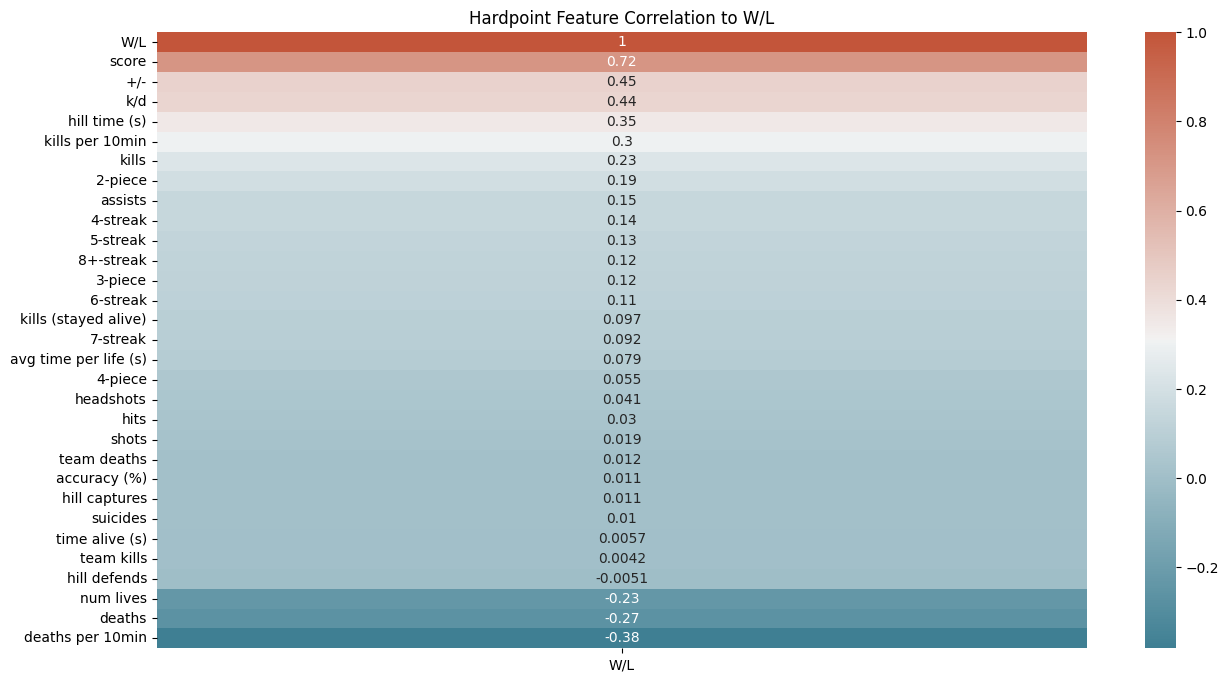

In [69]:
cols = ['W/L', 'score','kills', 'deaths', '+/-', 'k/d', 'kills per 10min', 'deaths per 10min',
'assists', 'headshots', 'suicides', 'team kills', 'team deaths', 'hill captures', 'hill defends', 
'2-piece', '3-piece', '4-piece', 'kills (stayed alive)', 'hits', 'shots', 'accuracy (%)', 'num lives',
'time alive (s)', 'avg time per life (s)', 'hill time (s)',
'4-streak', '5-streak', '6-streak', '7-streak', '8+-streak']

plt.figure(figsize=(15, 8))

sns.heatmap(
    cwl_2018_2019_hp[cols].corr()[['W/L']].sort_values(by=['W/L'],ascending=False),
    annot=True,
    cmap=sns.diverging_palette(220, 20, as_cmap=True)
).set(title='Hardpoint Feature Correlation to W/L');

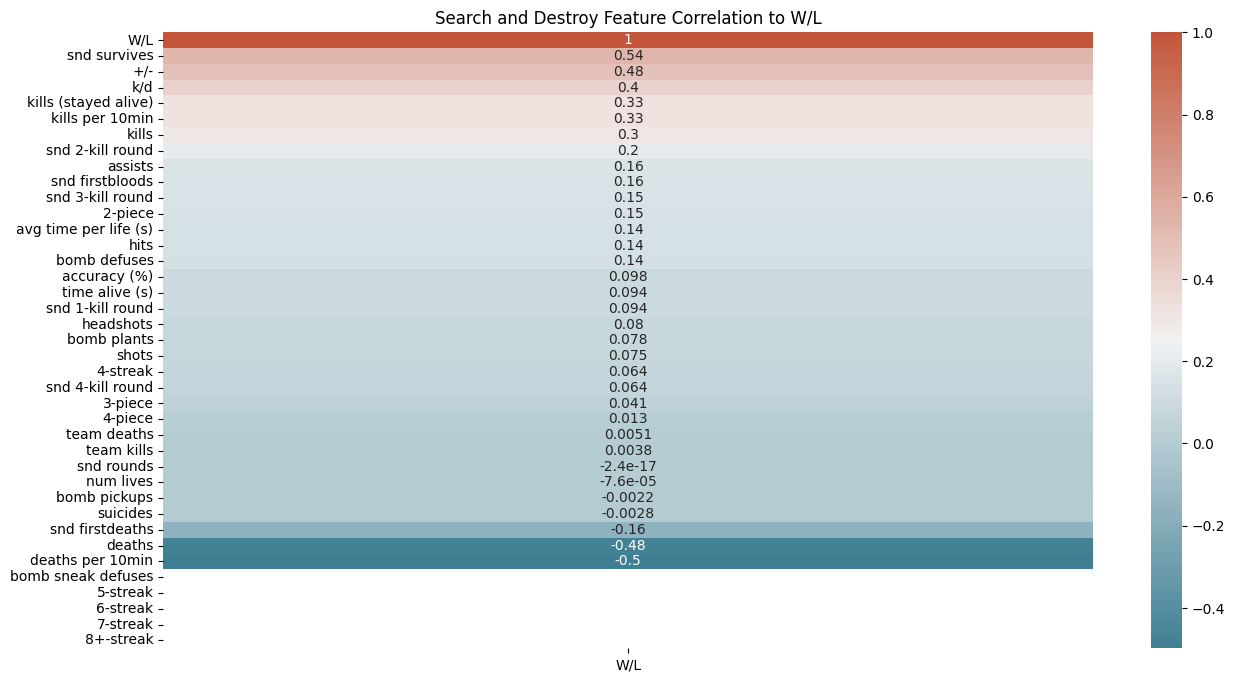

In [68]:
cols = ['W/L',
       'kills', 'deaths', '+/-', 'k/d', 'kills per 10min', 'deaths per 10min',
       'assists', 'headshots', 'suicides', 'team kills', 'team deaths',
       'kills (stayed alive)', 'hits', 'shots', 'accuracy (%)', 'num lives',
       'time alive (s)', 'avg time per life (s)', 'snd rounds',
       'snd firstbloods', 'snd firstdeaths', 'snd survives', 'bomb pickups',
       'bomb plants', 'bomb defuses', 'bomb sneak defuses', 'snd 1-kill round',
       'snd 2-kill round', 'snd 3-kill round', 'snd 4-kill round', '2-piece',
       '3-piece', '4-piece', '4-streak', '5-streak', '6-streak', '7-streak',
       '8+-streak']

plt.figure(figsize=(15, 8))

sns.heatmap(
    cwl_2018_2019_snd[cols].corr()[['W/L']].sort_values(by=['W/L'],ascending=False),
    annot=True,
    cmap=sns.diverging_palette(220, 20, as_cmap=True)
).set(title='Search and Destroy Feature Correlation to W/L');

# Possible Story: SND isn't supposed to be a high kill game, it's an objective game based on planting a bomb. 
# However, the data seems to suggest that time alive and kills are more important. This suggests that people aren't playing the game is intended